In [ ]:
import numpy as np
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt

###Union y Limpieza

In [ ]:
#Importar archivo csv
df1 = pd.read_csv('/content/rest-mex_2022_recommendation_data_training.csv')

In [ ]:
df1.shape

(1582, 7)

In [ ]:
df1.head(20)

In [ ]:
# Reemplaza 'N/I' con NaN
df1['Gender'].replace('N/I', np.nan, inplace=True)

# Elimina los registros con NaN en 'Gender'
df1.dropna(subset=['Gender'], inplace=True)
#Data already clean

In [ ]:
print(df1.columns.tolist())

['Index', 'Gender', 'Place', 'Location', 'Date', 'Type', 'Label']


###Añadir descripcion

In [ ]:
dfx = pd.read_csv('/content/Places.csv')

In [ ]:
print(dfx.columns.tolist())

['Lugar', 'Descripción', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']


In [ ]:
places = dfx[['Lugar', 'Descripción', 'Unnamed: 2']]

In [ ]:
places.head()

,Lugar,Descripción,Unnamed: 2
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...
1,Playa Los Muertos,Turismo de sol y playa,En Puerto Vallarta
2,Bucerias Art Walk,cultural|diversion,Hogar de uno de los paseos artísticos más sing...
3,Centro Historico de Tepic,cultural|religioso,La capital del Estado de Nayarit
4,Galerias Vallarta,diversion,En Galerías Vallarta contamos con todas las me...


In [ ]:
places.columns = ['Place', 'Descripcion','Descripcion2']

In [ ]:
dff = pd.merge(df1, places, on='Place')

In [ ]:
dff.shape

(1580, 9)

In [ ]:
dff.tail(20)

Guardamos en un archivo csv la union de places y recommendation

In [ ]:
dff.to_csv("recom_places.csv", index=False)

###1000 users

In [ ]:
import pandas as pd
import glob
import os

# Obtén una lista de todos los archivos csv en el directorio
archivos_csv = glob.glob('C:/Users/USUARIO/Desktop/DB/DataScience/Turismo/UsersTraining/*.csv')

# Crea una lista para almacenar tus dataframes
lista_dataframes = []

# Establece el número de archivos a leer a la vez
num_archivos = 10
EmptyFiles = []
# Recorre cada grupo de archivos
for i in range(0, len(archivos_csv), num_archivos):
    # Obtiene el grupo de archivos a leer
    grupo_archivos = archivos_csv[i:i+num_archivos]

    # Recorre cada archivo en el grupo
    for archivo in grupo_archivos:
        try:
            # Lee el archivo csv
            df = pd.read_csv(archivo, header=None)

            # Convierte todas las columnas a string
            df = df.astype(str)

            # Obtiene el nombre del archivo sin la extensión
            nombre_archivo = os.path.splitext(os.path.basename(archivo))[0]

            # Agrega una nueva columna con el nombre del archivo
            df['User'] = nombre_archivo

            # Reordena las columnas para que 'nombre_archivo' sea la primera columna
            df = df.reindex(['User'] + list(df.columns[:-1]), axis=1)

            # Añade el dataframe a la lista
            lista_dataframes.append(df)
        except pd.errors.EmptyDataError:
            EmptyFiles.append(archivo)
            ##print(f"El archivo {archivo} está vacío y será ignorado.")

    # Concatena los dataframes en el grupo y añade el resultado a la lista
    df_grupo = pd.concat(lista_dataframes, ignore_index=True)
    lista_dataframes = [df_grupo]

# Concatena todos los dataframes en uno solo
df_final = pd.concat(lista_dataframes, ignore_index=True)



print(EmptyFiles)
print(df_final.shape)
#df_final = df_final.reindex(['User'] + list(df_final.columns[:-1]), axis=1)
df_final.to_csv("unionall.csv", index=False)

In [ ]:
#Importar archivo csv
df2 = pd.read_csv('/content/unionall.csv')
df2.shape
print(df2.columns.tolist())

#df2 = df2.rename(columns={'User': 'Index'})
df2.columns = ['Index', 'Description','Satisfacc_N','LugarTurista','GlobalRate']
df2.head()

['User', '0', '1', '2', '3']


,Index,Description,Satisfacc_N,LugarTurista,GlobalRate
0,Usuario0,"La playa, sencillamente es hermosa, mis hijos ...",4.0,Sayulita Beach,4.0
1,Usuario0,Hermoso lugar... Aunque muy fría el agua... Mu...,4.0,Balneario Agua Fría,4.0
2,Usuario0,La cerdad vale la pena visitar eate lugar... C...,4.0,Los Molcajetes de Villa,4.5
3,Usuario0,"Debes visitar ""La Casa de Piedra"", ambiente mu...",4.0,La Casa de Piedra,4.0
4,Usuario0,Hola amig@s... Este es realmente un buen lugar...,4.0,Zoológico Guadalajara,4.5


In [ ]:
df2['GlobalRate'] = df2['GlobalRate'].replace(40.4, 4.0)
df2['Satisfacc_N'] = df2['Satisfacc_N'].replace(40.4, 4.0)

In [ ]:
df2['Satisfacc_N'] = df2['Satisfacc_N'].fillna(0)
df2['GlobalRate'] = df2['GlobalRate'].fillna(0)

In [ ]:
df2.to_csv("unionallx.csv", index=False)

###Visualizacion

In [ ]:
Training = pd.read_csv('/content/unionallx.csv')
Testing = pd.read_csv('/content/recom_places.csv')

In [ ]:
Training

,Index,Description,Satisfacc_N,LugarTurista,GlobalRate
0,Usuario0,"La playa, sencillamente es hermosa, mis hijos ...",4.0,Sayulita Beach,4.0
1,Usuario0,Hermoso lugar... Aunque muy fría el agua... Mu...,4.0,Balneario Agua Fría,4.0
2,Usuario0,La cerdad vale la pena visitar eate lugar... C...,4.0,Los Molcajetes de Villa,4.5
3,Usuario0,"Debes visitar ""La Casa de Piedra"", ambiente mu...",4.0,La Casa de Piedra,4.0
4,Usuario0,Hola amig@s... Este es realmente un buen lugar...,4.0,Zoológico Guadalajara,4.5
...,...,...,...,...,...
23865,Usuario999,We stayed in Saint Saëns and this was one of o...,5.0,Le Relais Normand,4.0
23866,Usuario999,Jess did a splendid job as our guide. Loved le...,5.0,Devour Paris,5.0
23867,Usuario999,We had the small group Louvre tour with Lauren...,5.0,City Wonders,4.5
23868,Usuario999,We went here once for dessert when the snooty ...,5.0,Zizi,3.5


In [ ]:
Testing

,Index,Gender,Place,Location,Date,Type,Label,Descripcion,Descripcion2
0,Usuario1221,Male,Islas Marietas,Occidente,diciembre de 2013,Family,5,Turismo de sol y playa|Aventura|ecoturismo,El Parque Nacional Islas Marietas
1,Usuario870,Male,Islas Marietas,Estados Unidos,diciembre de 2014,Alone,5,Turismo de sol y playa|Aventura|ecoturismo,El Parque Nacional Islas Marietas
2,Usuario616,Female,Islas Marietas,Centro,julio de 2014,Couple,5,Turismo de sol y playa|Aventura|ecoturismo,El Parque Nacional Islas Marietas
3,Usuario704,Female,Islas Marietas,Centro,enero de 2015,Couple,5,Turismo de sol y playa|Aventura|ecoturismo,El Parque Nacional Islas Marietas
4,Usuario1079,Male,Islas Marietas,Noreste,enero de 2016,Family,5,Turismo de sol y playa|Aventura|ecoturismo,El Parque Nacional Islas Marietas
...,...,...,...,...,...,...,...,...,...
1575,Usuario277,Male,Isla Isabel,Occidente,abril de 2018,Family,4,Turismo de sol y playa|ecoturismo,La Isla Isabel es una isla del océano Pacífico
1576,Usuario275,Male,Isla Isabel,Estados Unidos,abril de 2017,Friends,1,Turismo de sol y playa|ecoturismo,La Isla Isabel es una isla del océano Pacífico
1577,Usuario1618,Male,Mexcaltitan,Reino Unido,marzo de 2018,Friends,5,Naturaleza,Mexcaltitán es una localidad del municipio de ...
1578,Usuario1619,Male,Mexcaltitan,Sureste,agosto de 2016,Family,4,Naturaleza,Mexcaltitán es una localidad del municipio de ...


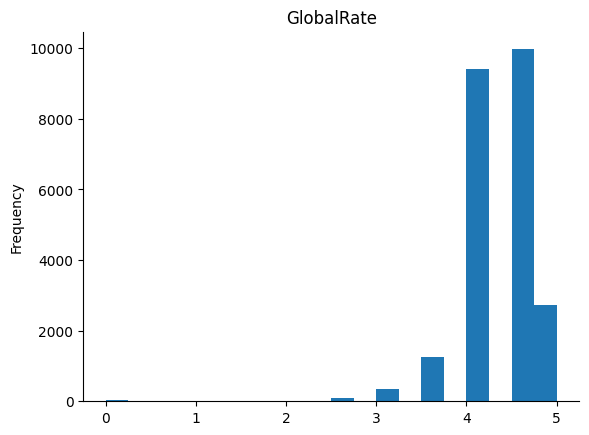

In [ ]:

Training['GlobalRate'].plot(kind='hist', bins=20, title='GlobalRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

Cantidad total de veces que votaron por cada calificacion en la puntuacion global

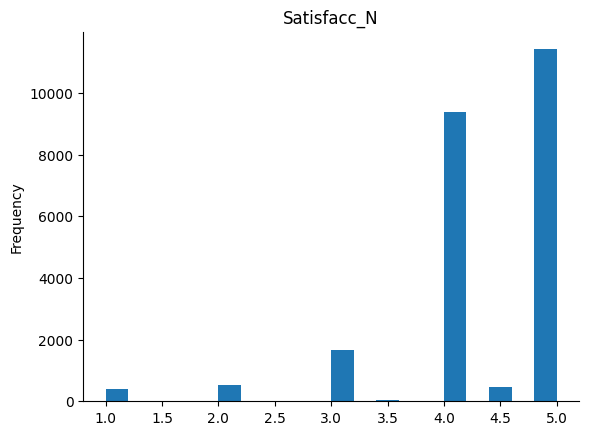

In [ ]:

Training['Satisfacc_N'].plot(kind='hist', bins=20, title='Satisfacc_N')
plt.gca().spines[['top', 'right',]].set_visible(False)

Cantidad total de veces que votaron por cada calificacion en la satisfaccion que tuvo en cada usuario

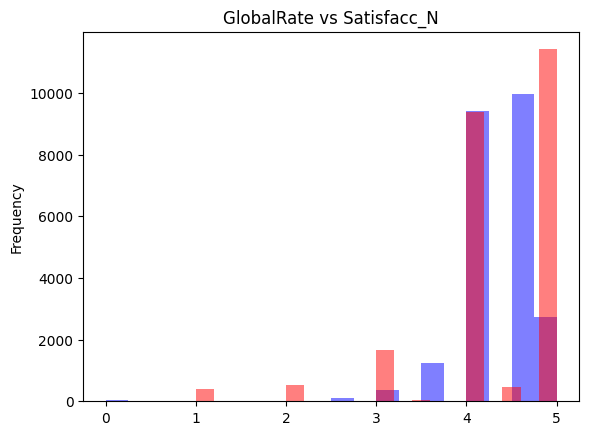

In [ ]:
import matplotlib.pyplot as plt

# Crear un histograma para 'GlobalRate'
Training['GlobalRate'].plot(kind='hist', bins=20, title='GlobalRate vs Satisfacc_N', color='blue', alpha=0.5)

# Crear un histograma para 'Satisfacc_N' en la misma gráfica
Training['Satisfacc_N'].plot(kind='hist', bins=20, color='red', alpha=0.5)

plt.gca().spines[['top', 'right']]#.set_visible(False)
plt.show()  # Mostrar el gráfico

Cantidad total de veces que votaron por cada calificacion pero satisfaccion y puntaje global en la misma grafica

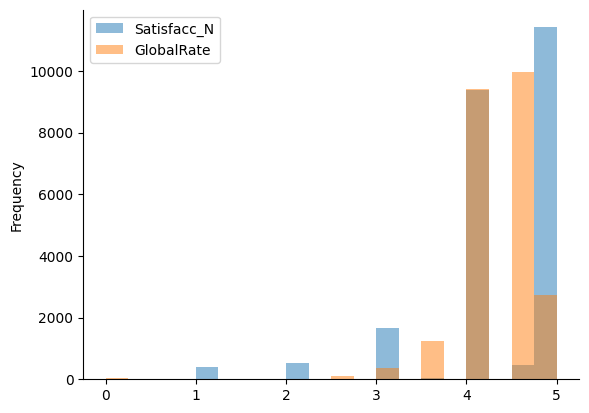

In [ ]:
import matplotlib.pyplot as plt

Training[['Satisfacc_N', 'GlobalRate']].plot(kind='hist', bins=20, alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


antidad total de veces que votaron por cada calificacion pero satisfaccion y puntaje global en la misma grafica

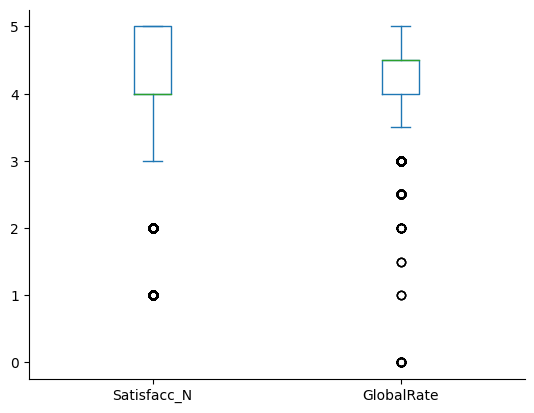

In [ ]:
Training[['Satisfacc_N', 'GlobalRate']].plot(kind='box')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


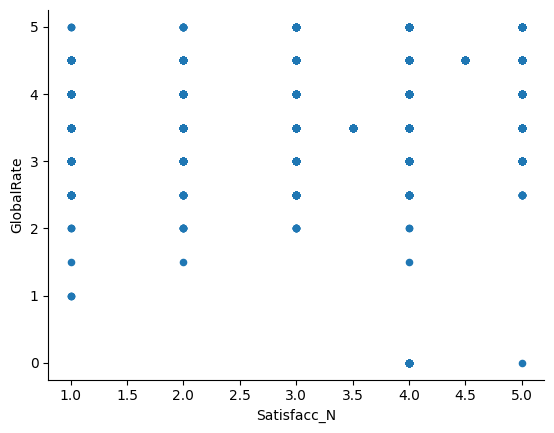

In [ ]:
Training.plot(kind='scatter', x='Satisfacc_N', y='GlobalRate')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


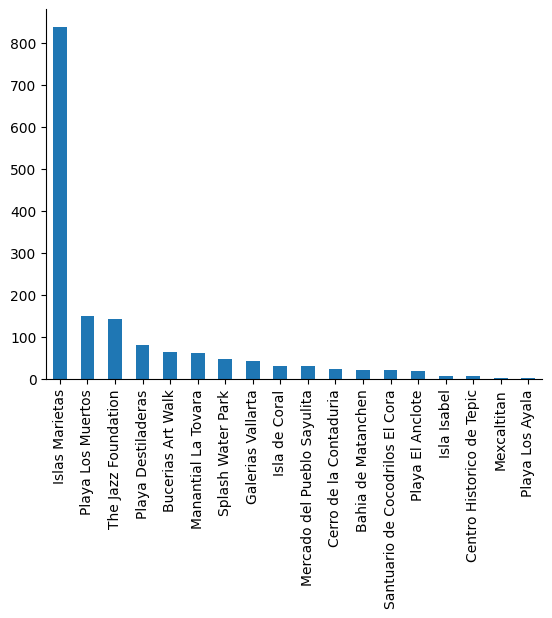

In [ ]:
Testing['Place'].value_counts().plot(kind='bar')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


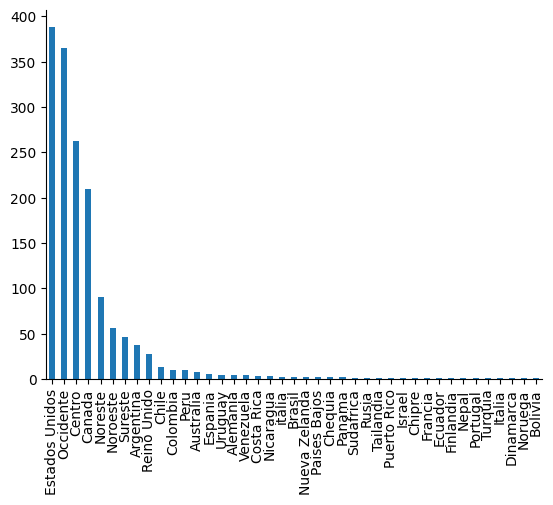

In [ ]:
Testing['Location'].value_counts().plot(kind='bar')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

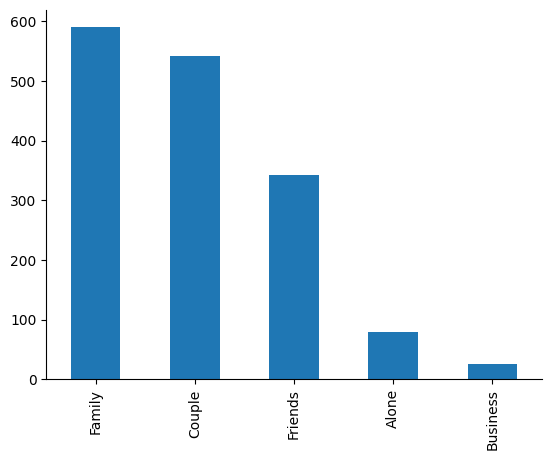

In [ ]:
Testing['Type'].value_counts().plot(kind='bar')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

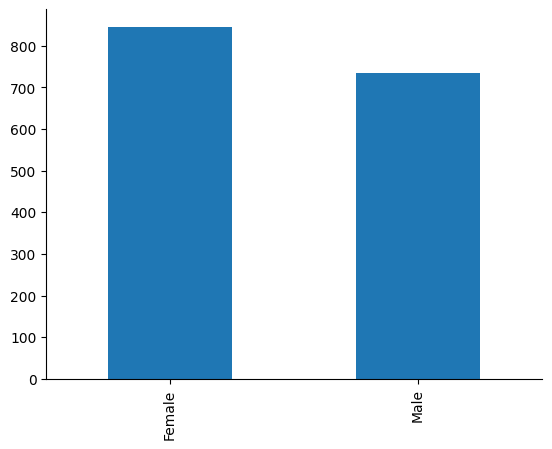

In [ ]:
Testing['Gender'].value_counts().plot(kind='bar')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

###Modelo

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

# Cargar los datos
# Asegúrate de que tu archivo CSV esté en el mismo directorio que tu script de Python
# o proporciona la ruta completa al archivo CSV
#df = pd.read_csv('tu_archivo.csv')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Training['Description'], Training['Satisfacc_N'], test_size=0.2, random_state=42)

# Crear un objeto TfidfVectorizer y transformar los datos de texto
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Crear un modelo de regresión lineal y entrenarlo
model = LinearRegression()
model.fit(X_train_vec, y_train)

# Evaluar el modelo en el conjunto de prueba
score = model.score(X_test_vec, y_test)
print(f'Accuracy: {score}')


Accuracy: -0.3694112563723224


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

# Descargar las palabras vacías y el lematizador de WordNet de nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar los datos
df = pd.read_csv('/content/unionallx.csv')

# Crear un objeto WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocesar las descripciones
df['Description'] = df['Description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stopwords.words('spanish'))]))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['GlobalRate'], test_size=0.2, random_state=42)

# Crear un objeto TfidfVectorizer y transformar los datos de texto
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Crear un modelo de regresión lineal y entrenarlo
model = LinearRegression()
model.fit(X_train_vec, y_train)

# Evaluar el modelo en el conjunto de prueba
score = model.score(X_test_vec, y_test)
print(f'Accuracy: {score}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: -0.4649052344932463


In [ ]:
# Predecir los valores de prueba
y_pred = model.predict(X_test_vec)

# Crear un dataframe con las predicciones y los valores reales
df_results = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})

# Mostrar las primeras filas del dataframe
print(df_results.head())


       Real  Predicho
17665   4.5  4.781986
19279   4.0  3.490236
19806   4.5  4.974277
23025   4.5  3.858435
11123   4.5  4.499901


In [ ]:
df_results.shape

(4774, 3)

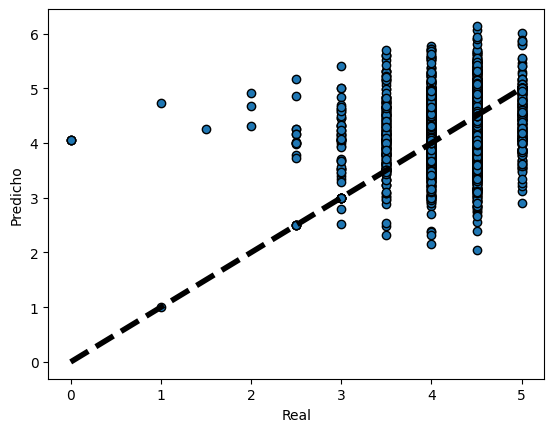

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crear un gráfico de dispersión con los valores reales y predichos
ax.scatter(df_results['Real'], df_results['Predicho'], edgecolors=(0, 0, 0))

# Establecer las etiquetas de los ejes
ax.set_xlabel('Real')
ax.set_ylabel('Predicho')

# Crear una línea de identidad (diagonal) para comparar visualmente las predicciones con los valores reales
ax.plot([df_results['Real'].min(), df_results['Real'].max()], [df_results['Real'].min(), df_results['Real'].max()], 'k--', lw=4)

# Mostrar el gráfico
plt.show()


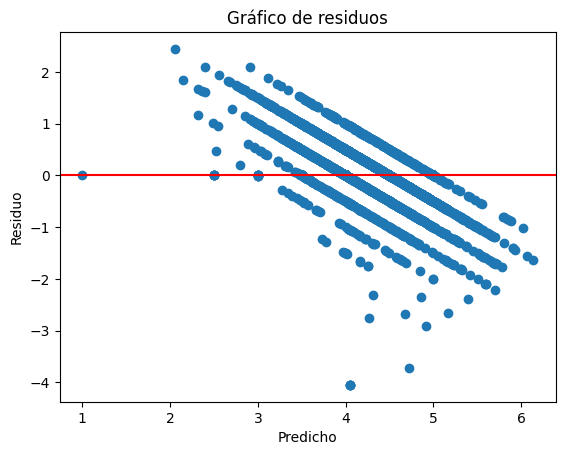

In [ ]:
import matplotlib.pyplot as plt

# Calcular los residuos
residuos = df_results['Real'] - df_results['Predicho']

# Crear un gráfico de dispersión de los residuos
plt.scatter(df_results['Predicho'], residuos)
plt.xlabel('Predicho')
plt.ylabel('Residuo')
plt.axhline(y=0, color='r', linestyle='-')  # línea horizontal en 0 para referencia
plt.title('Gráfico de residuos')
plt.show()


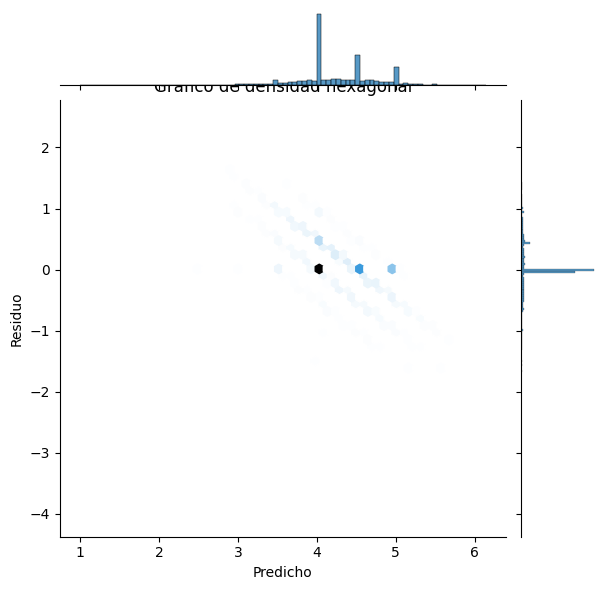

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de densidad hexagonal
sns.jointplot(x=df_results['Predicho'], y=residuos, kind='hex')

plt.xlabel('Predicho')
plt.ylabel('Residuo')
plt.title('Gráfico de densidad hexagonal')
plt.show()


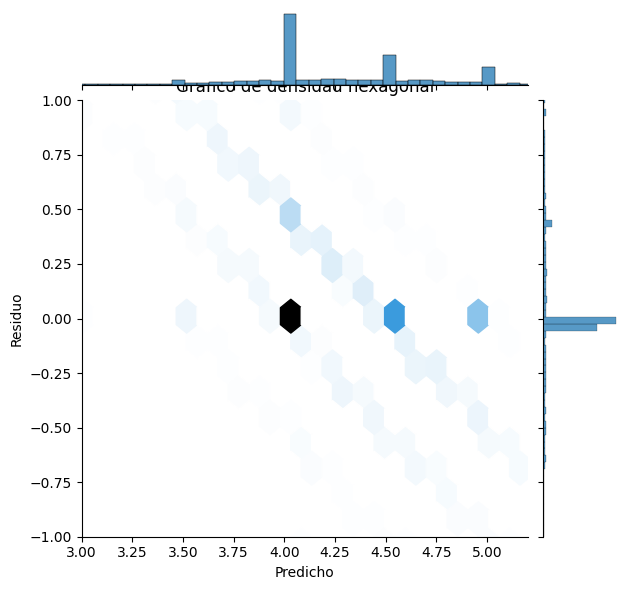

In [ ]:
  g = sns.jointplot(x=df_results['Predicho'], y=residuos, kind='hex', height=6)

xmin=3
xmax=5.2
ymin=-1
ymax=1
# Ajustar los límites de los ejes
g.ax_joint.set_xlim([xmin, xmax])
g.ax_joint.set_ylim([ymin, ymax])

plt.xlabel('Predicho')
plt.ylabel('Residuo')
plt.title('Gráfico de densidad hexagonal')
plt.show()